In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_excel('/ASIANPAINT (1).xlsx')

#print the head
df.head()

,Date,Adj_Close
0,2015-01-01,714.732971
1,2015-01-02,739.443176
2,2015-01-05,739.395447
3,2015-01-06,721.745300
4,2015-01-07,736.247131


,Date,Adj_Close
Date,,
2015-01-01,2015-01-01,714.732971
2015-01-02,2015-01-02,739.443176
2015-01-05,2015-01-05,739.395447
2015-01-06,2015-01-06,721.745300
2015-01-07,2015-01-07,736.247131


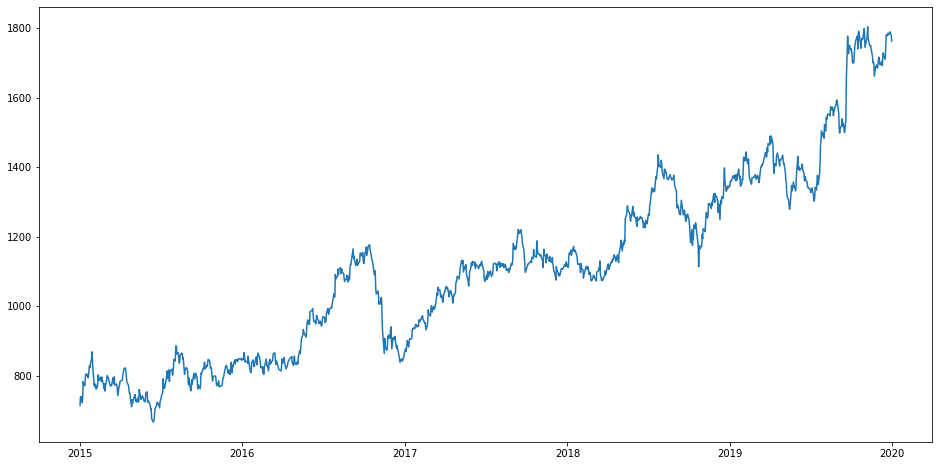

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj_Close'], label='Close Price history')
df.head()

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj_Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj_Close'][i] = data['Adj_Close'][i]
new_data.head()

,Date,Adj_Close
0,2015-01-01 00:00:00,714.732971
1,2015-01-02 00:00:00,739.443176
2,2015-01-05 00:00:00,739.395447
3,2015-01-06 00:00:00,721.7453
4,2015-01-07 00:00:00,736.247131


In [ ]:
from fastai.tabular import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

new_data.head()

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:64: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


,Adj_Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,714.732971,2015,1,1,1,3,1,False,True,False,True,False,True
1,739.443176,2015,1,1,2,4,2,False,False,False,False,False,False
2,739.395447,2015,1,2,5,0,5,False,False,False,False,False,False
3,721.7453,2015,1,2,6,1,6,False,False,False,False,False,False
4,736.247131,2015,1,2,7,2,7,False,False,False,False,False,False


In [ ]:
#split into train and validation
split=round(len(df)*0.75)
train = new_data[:split]
valid = new_data[split:]

x_train = train.drop(columns=['Adj_Close','Dayofyear','Is_month_end','Is_month_start','Is_quarter_end','Is_quarter_start','Is_year_start','Is_year_end'], axis=1)
y_train = train['Adj_Close']
x_test = valid.drop(columns=['Adj_Close','Dayofyear','Is_month_end','Is_month_start','Is_quarter_end','Is_quarter_start','Is_year_start','Is_year_end'], axis=1)

y_test = valid['Adj_Close']
print(valid)

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

        Adj_Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
922   1253.897095  2018      9    39   26          2        269         False   
923   1259.276489  2018      9    39   27          3        270         False   
924   1264.949463  2018      9    39   28          4        271         False   
925   1251.745361  2018     10    40    1          0        274         False   
926   1224.310181  2018     10    40    3          2        276         False   
...           ...   ...    ...   ...  ...        ...        ...           ...   
1224  1780.978882  2019     12    52   24          1        358         False   
1225  1787.052368  2019     12    52   26          3        360         False   
1226  1789.669312  2019     12    52   27          4        361         False   
1227  1779.843384  2019     12     1   30          0        364         False   
1228  1762.709351  2019     12     1   31          1        365          True   

      Is_month_start  Is_qu

LinearRegression()

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("RMSE Value=",rms)

RMSE Value= 151.6099564203985


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


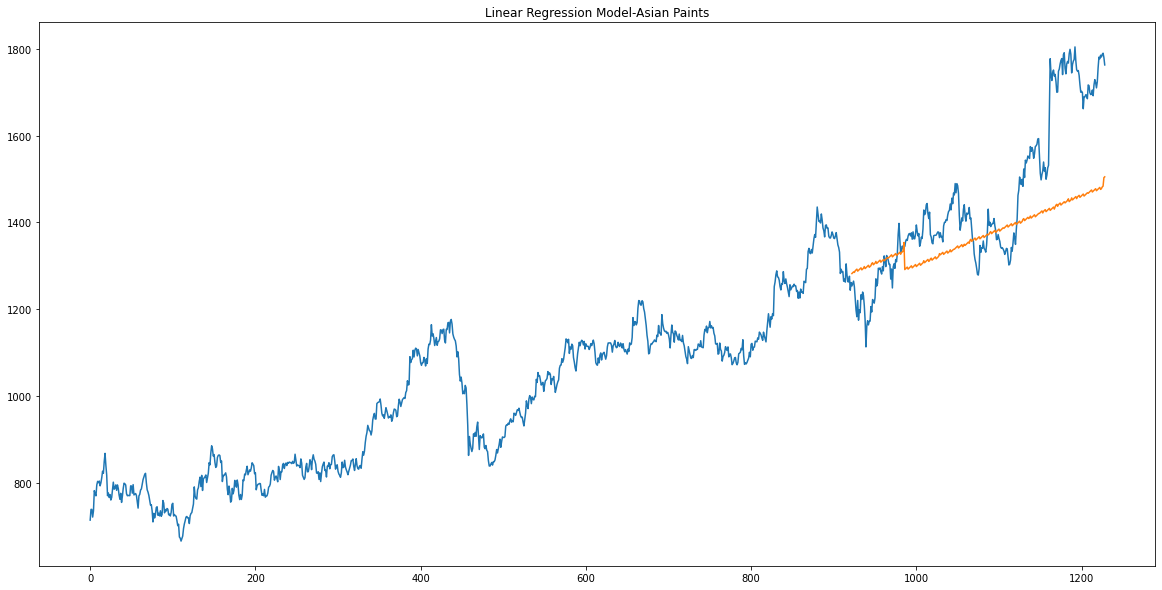

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[split:].index
train.index = new_data[:split].index
plt.title('Linear Regression Model-Asian Paints')
plt.plot(new_data['Adj_Close'],label='Actual')
plt.plot(valid[ 'Predictions'],label='Predicted')